In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
academic_term = pd.read_csv("academic_term.csv")
course_grade = pd.read_csv("course_grade.csv", dtype={
                           'person_id': int, 'grade': str, 'grade_points_per_credit': float, 'grading_basis': str})
course_offering = pd.read_csv("course_offering.csv")
course_section = pd.read_csv("course_section.csv")
course_section_enrollment = pd.read_csv("course_section_enrollment.csv")
person = pd.read_csv("person.csv")

# Data Exploration

In [3]:
course_offering

,course_id,course_subject,course_number,course_title,course_start_date,course_end_date,academic_term_id,course_status
0,341795,HPAS,1007,Basic CPR,2019-08-26,2019-10-07,50,Published
1,231179,HONR,1300,Honors First-Year Seminar,2019-09-09,2019-10-07,50,Published
2,277411,MGMT,9210,Law and Ethics,2020-05-22,2020-06-19,64,Published
3,178588,OPER,8122,Operative Dentistry I,2019-11-18,2020-06-19,50,Published
4,340250,OPER,5245,Pre-Clinical Teaching,2020-01-06,2020-06-19,64,Published
...,...,...,...,...,...,...,...,...
53006,297358,LLS,1400,Flat Water Canoeing,2019-09-25,2019-10-06,50,Published
53007,227204,LLS,1300,Recreational Cycling,2019-10-02,2019-10-06,50,Published
53008,258999,CCP,1304,Job Search Essentials,2019-08-26,2019-10-06,50,Published
53009,227547,LLS,1200,Introduction to Rock Climbing,2019-10-02,2019-10-06,50,Published


In [4]:
course_offering.isna().sum()

course_id            0
course_subject       0
course_number        0
course_title         0
course_start_date    0
course_end_date      0
academic_term_id     0
course_status        0
dtype: int64

In [5]:
course_grade.describe(include = 'all')

,course_section_id,person_id,grade,grade_points,grade_points_per_credit,grading_basis,final_score
count,1.011440e+06,1.011440e+06,684513,684513.000000,684513.000000,684513,825534.000000
unique,NaN,NaN,25,NaN,NaN,5,NaN
top,NaN,NaN,A,NaN,NaN,Graded,NaN
freq,NaN,NaN,172593,NaN,NaN,545571,NaN
mean,1.189458e+05,2.963603e+05,NaN,7.601306,2.585468,NaN,71.133484
std,6.251654e+04,1.711489e+05,NaN,5.174425,1.561991,NaN,37.336434
min,7.000000e+00,1.800000e+01,NaN,0.000000,0.000000,NaN,-45.330000
25%,6.596000e+04,1.472990e+05,NaN,3.330000,1.670000,NaN,64.500000
50%,1.290550e+05,2.964690e+05,NaN,9.000000,3.000000,NaN,82.910000
75%,1.592830e+05,4.449760e+05,NaN,12.000000,4.000000,NaN,91.850000


# Task 1: Pass Rate

Which courses have the highest percentage of students with passing grades (course grade > 70%)? Can you show this over time (i.e. include the academic_term data)?

Which tables/fields do we need? 

**course_grade** for *grade_points_per_credit*, *grading_basis* (potentially)

**course_section** to connect to **course_offering**

**course_offering** to get *academic_term_id*, and 

**academic_term** to get the terms

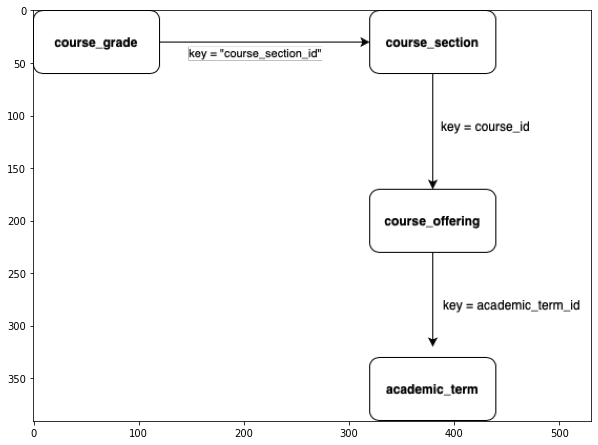

In [6]:
import matplotlib.image as mpimg
image = mpimg.imread("task1.png")
plt.figure(figsize=(10, 10))
plt.imshow(image, aspect='1')
plt.show()

In [7]:
course_grade.head()

,course_section_id,person_id,grade,grade_points,grade_points_per_credit,grading_basis,final_score
0,40088,144448,D+,5.32,1.33,Graded,68.30
1,141500,220562,D+,3.99,1.33,Graded,67.00
2,67405,50810,D-,2.01,0.67,Graded,NaN
3,14687,510473,D+,3.99,1.33,Graded,51.04
4,19411,411298,D-,2.01,0.67,Graded,48.42


In [8]:
course_grade.grade_points_per_credit.value_counts()

4.00    173056
0.00    155498
3.67     74027
3.00     72555
3.33     55675
2.67     36051
4.33     30601
2.00     29890
2.33     24643
1.67     12967
1.00      6139
1.33      4891
0.67      2444
3.20       594
3.30       577
3.50       563
3.80       498
3.40       469
3.90       456
3.60       416
3.70       414
4.10       387
3.10       383
2.90       326
4.20       203
2.80       181
2.70       142
4.30       136
2.60       134
2.50        77
2.40        54
2.30        24
2.20        18
2.10         9
1.80         4
1.50         4
1.90         4
1.70         2
1.60         1
Name: grade_points_per_credit, dtype: int64

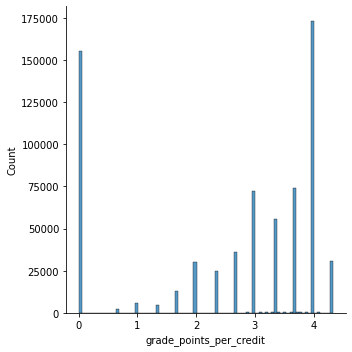

In [9]:
sns.displot(course_grade.grade_points_per_credit)

Two things that stand out:

* We don't see much of a bell curve. In fact we see a huge peak at 4 -> Grade inflation

* Too many 0s. This probably has to do with *grading_basis*, i.e. there are courses that are carried out on a pass/fail basis so a fail automatically translates to 0, or students drop/withdraw etc.

In [10]:
course_grade.grading_basis.value_counts()

Graded       545571
PassFail     104843
Withdrawn     19731
Other         12882
Audit          1486
Name: grading_basis, dtype: int64

Look at the grade scores for graded courses only

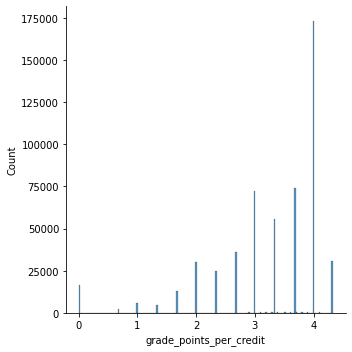

In [11]:
sns.displot(course_grade[course_grade.grading_basis ==
            'Graded']['grade_points_per_credit'])

Let's consider passing score = C- or better, which equates to 1.67 grade score

Next we will merge the tables and validate each step of the way

In [12]:
task1 = course_grade.merge(course_section, how='left', on='course_section_id', validate='m:1')\
                    .merge(course_offering, how='left', on='course_id', validate='m:1')\
                    .merge(academic_term, how='left', on='academic_term_id', validate='m:1')

In [13]:
task1.columns

Index(['course_section_id', 'person_id', 'grade', 'grade_points',
       'grade_points_per_credit', 'grading_basis', 'final_score', 'course_id',
       'course_section_status', 'max_enrollment', 'delivery_mode',
       'course_subject', 'course_number', 'course_title', 'course_start_date',
       'course_end_date', 'academic_term_id', 'course_status', 'name',
       'term_begin_date', 'term_end_date', 'term_type', 'term_year'],
      dtype='object')

Keep only the columns we need 

In [14]:
task1 = task1[['person_id', 'grade_points_per_credit', 'grading_basis',
               'course_subject', 'course_title', 'name', 'term_begin_date']]

In [15]:
task1

,person_id,grade_points_per_credit,grading_basis,course_subject,course_title,name,term_begin_date
0,144448,1.33,Graded,STAT,Statistics for Business,Spring 2019,2019-01-14
1,220562,1.33,Graded,CCCC,Foundations Critical Cultural Competence,Fall 2018,2018-08-20
2,50810,0.67,Graded,ECE,Switching Theory,Fall 2018,2018-08-20
3,510473,1.33,Graded,ENTR,Managing the Growth Business,Fall 2018,2018-08-20
4,411298,0.67,Graded,ENGL,The Interpretation of Literature,Spring 2019,2019-01-14
...,...,...,...,...,...,...,...
1011435,544615,2.33,Graded,PSY,Elementary Psychology,Fall 2019,2019-08-26
1011436,102693,2.33,Graded,PHAR,IP: Dermatology & Sensory,Fall 2019,2019-08-26
1011437,465131,2.33,Graded,MGMT,Introduction to Law,Spring 2019,2019-01-14
1011438,317966,2.33,Graded,COMM,Media and Society,Fall 2020,2020-08-24


Check if we have NaN in the *grade_points_per_credit* column

In [16]:
task1['grade_points_per_credit'].isna().sum()

326927

In [17]:
task1.dropna(subset=['grade_points_per_credit'],
             inplace=True)  # drop NaN values

In [18]:
count = task1[task1.grading_basis == 'Graded']\
    .groupby(['term_begin_date', 'course_title'])['grade_points_per_credit']\
    .count().rename('total_count')\
    .reset_index()  # get total count of all grades for each course by term

In [19]:
count_pass = task1[task1.grading_basis == 'Graded']\
    .groupby(['term_begin_date', 'course_title'])['grade_points_per_credit']\
    .apply(lambda x: x[(x >= 1.67)].count()/x.count()*100)\
    .rename('percentage_pass')\
    .reset_index()  # get percentage of passing grades/all grades for each course by term

In [20]:
count.head()

,term_begin_date,course_title,total_count
0,2018-08-20,20th C Afr Amer Rel: Civil Right-Hip Hop,11
1,2018-08-20,3-D Computer-Aided Design,1
2,2018-08-20,AFROTC Leadership Lab AS 100 - FA,1
3,2018-08-20,Abdominal Sonography I,10
4,2018-08-20,Abdominal Sonography I Lab,8


In [21]:
count_pass.head()

,term_begin_date,course_title,percentage_pass
0,2018-08-20,20th C Afr Amer Rel: Civil Right-Hip Hop,81.818182
1,2018-08-20,3-D Computer-Aided Design,100.000000
2,2018-08-20,AFROTC Leadership Lab AS 100 - FA,0.000000
3,2018-08-20,Abdominal Sonography I,100.000000
4,2018-08-20,Abdominal Sonography I Lab,100.000000


Sanity check on one of the entries

In [22]:
task1[(task1.course_title == 'Abdominal Sonography I')
      & (task1.name == 'Fall 2018')]

,person_id,grade_points_per_credit,grading_basis,course_subject,course_title,name,term_begin_date
820710,443790,2.00,Graded,RSMS,Abdominal Sonography I,Fall 2018,2018-08-20
822200,70015,2.00,Graded,RSMS,Abdominal Sonography I,Fall 2018,2018-08-20
866813,200400,3.67,Graded,RSMS,Abdominal Sonography I,Fall 2018,2018-08-20
890287,515961,3.67,Graded,RSMS,Abdominal Sonography I,Fall 2018,2018-08-20
934586,435895,3.33,Graded,RSMS,Abdominal Sonography I,Fall 2018,2018-08-20
980736,207561,2.67,Graded,RSMS,Abdominal Sonography I,Fall 2018,2018-08-20
986603,407150,2.67,Graded,RSMS,Abdominal Sonography I,Fall 2018,2018-08-20
990439,105367,2.67,Graded,RSMS,Abdominal Sonography I,Fall 2018,2018-08-20
999970,362410,2.33,Graded,RSMS,Abdominal Sonography I,Fall 2018,2018-08-20
1004842,277178,2.33,Graded,RSMS,Abdominal Sonography I,Fall 2018,2018-08-20


In [23]:
count_pass = count_pass.merge(count, how='inner')

In [24]:
count_pass.head()

,term_begin_date,course_title,percentage_pass,total_count
0,2018-08-20,20th C Afr Amer Rel: Civil Right-Hip Hop,81.818182,11
1,2018-08-20,3-D Computer-Aided Design,100.000000,1
2,2018-08-20,AFROTC Leadership Lab AS 100 - FA,0.000000,1
3,2018-08-20,Abdominal Sonography I,100.000000,10
4,2018-08-20,Abdominal Sonography I Lab,100.000000,8


In [25]:
count_pass.to_csv("task1.csv")

In [26]:
count_pass[count_pass.percentage_pass == 100]

,term_begin_date,course_title,percentage_pass,total_count
1,2018-08-20,3-D Computer-Aided Design,100.0,1
3,2018-08-20,Abdominal Sonography I,100.0,10
4,2018-08-20,Abdominal Sonography I Lab,100.0,8
5,2018-08-20,Abnormal Psychology,100.0,64
7,2018-08-20,Abstract Algebra I,100.0,7
...,...,...,...,...
13897,2020-08-24,Writing for Health and Human Physiology,100.0,55
13898,2020-08-24,Writing in the Science Classroom,100.0,7
13899,2020-08-24,Writing to Change the World,100.0,23
13900,2020-08-24,Wrongful Convictions,100.0,14


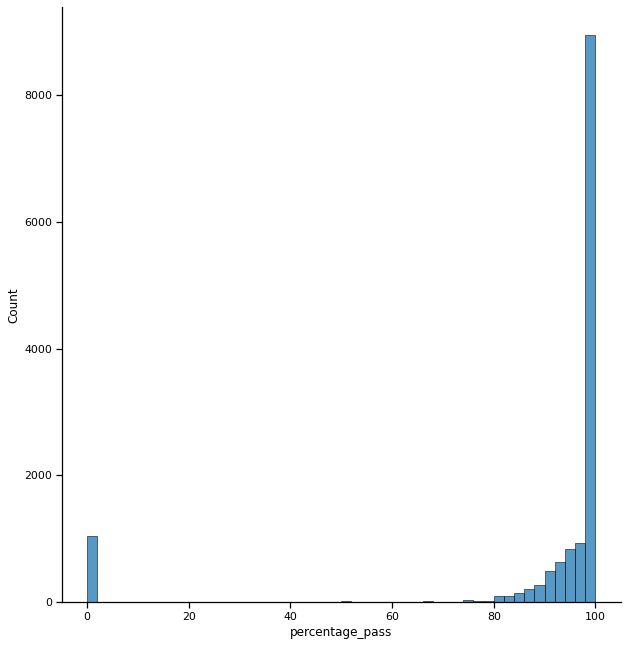

In [27]:
sns.set_context('notebook')
ax = sns.displot(count_pass['percentage_pass'], bins=50)
ax.fig.set_figwidth(10)
ax.fig.set_figheight(10)

In [28]:
# get the statistics for the total grades each course
count['total_count'].describe()

count    13904.000000
mean        39.238421
std         87.573772
min          1.000000
25%          7.000000
50%         16.000000
75%         39.000000
max       2222.000000
Name: total_count, dtype: float64

A quick look at the number of total graded students at the end of each course shows that the range is huge. It would be better if we had the data to categorize courses into different levels/seniorities. But right now this is all we have.

Actionable:
    
* See what introductory courses of what subjects consistently have a lower passing rate than other intro courses. Learn from the courses with better passing rates.

# Task 2: Enrollment

#### Which tables/fields do we need? 

**course_section_enrollment** to count the number of students, using *person_id* and *role*

**course_section** to connect to **course_offering**

**course_offering** to get *course_subject*

**academic_term**

In [29]:
course_section_enrollment.isna().sum()

course_section_id         0
person_id                 0
role                      0
role_status               0
credits_taken        815322
dtype: int64

In [30]:
task2 = course_section_enrollment.merge(course_section, how='left', on='course_section_id', validate='m:1')\
                                 .merge(course_offering, how='left', on='course_id', validate='m:1')\
                                 .merge(academic_term, how='left', on='academic_term_id', validate='m:1')
# join and validate along the way

In [31]:
task2

,course_section_id,person_id,role,role_status,credits_taken,course_id,course_section_status,max_enrollment,delivery_mode,course_subject,...,course_title,course_start_date,course_end_date,academic_term_id,course_status,name,term_begin_date,term_end_date,term_type,term_year
0,36388,562397,TeachingAssistant,Pre-registered,NaN,303058.0,active,153.0,FaceToFace,ACB,...,Medical Gross Human Anatomy,2018-08-13,2018-12-14,34.0,Published,Fall 2018,2018-08-20,2018-12-07,Fall,2018.0
1,159369,82419,Teacher,Pre-registered,NaN,194501.0,active,0.0,FaceToFace,BIOS,...,Preceptorship in Biostatistics,2020-01-21,2020-05-08,64.0,Published,Spring 2020,2020-01-21,2020-05-08,Spring,2019.0
2,196313,148035,Teacher,Not-enrolled,NaN,353647.0,active,10.0,Online,LAW,...,SJD Tutorial,2020-08-24,2020-12-03,66.0,Published,Fall 2020,2020-08-24,2020-12-11,Fall,2020.0
3,195123,101982,TeachingAssistant,Pre-registered,NaN,354938.0,active,20.0,FaceToFace,PHYS,...,Introductory Physics II,2020-08-24,2020-12-11,66.0,Published,Fall 2020,2020-08-24,2020-12-11,Fall,2020.0
4,193299,188559,Designer,Pre-registered,NaN,348084.0,active,120.0,Online,GWSS,...,Sex & Popular Culture in America,2020-08-24,2020-12-11,66.0,Published,Fall 2020,2020-08-24,2020-12-11,Fall,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704338,119590,197288,Student,Withdrawn,5.0,329168.0,active,20.0,BlendedLearning,SPAN,...,Elementary Spanish I,2019-01-14,2019-05-03,46.0,Published,Spring 2019,2019-01-14,2019-05-03,Spring,2018.0
1704339,196077,518917,Student,Withdrawn,5.0,349710.0,active,15.0,Online,ARAB,...,Intermediate Modern Standard Arabic I,2020-08-24,2020-12-11,66.0,Published,Fall 2020,2020-08-24,2020-12-11,Fall,2020.0
1704340,155996,39427,Student,Withdrawn,5.0,181137.0,active,20.0,FaceToFace,CLSL,...,Elementary Latin I,2020-01-21,2020-05-08,64.0,Published,Spring 2020,2020-01-21,2020-05-08,Spring,2019.0
1704341,40844,417732,Student,Withdrawn,5.0,285124.0,active,20.0,BlendedLearning,SPAN,...,Elementary Spanish I,2019-08-26,2019-12-13,50.0,Published,Fall 2019,2019-08-26,2019-12-13,Fall,2019.0


In [32]:
task2 = task2[['course_section_id', 'person_id', 'role',
               'role_status', 'course_subject', 'name', 'term_begin_date']]

In [33]:
task2.head()

,course_section_id,person_id,role,role_status,course_subject,name,term_begin_date
0,36388,562397,TeachingAssistant,Pre-registered,ACB,Fall 2018,2018-08-20
1,159369,82419,Teacher,Pre-registered,BIOS,Spring 2020,2020-01-21
2,196313,148035,Teacher,Not-enrolled,LAW,Fall 2020,2020-08-24
3,195123,101982,TeachingAssistant,Pre-registered,PHYS,Fall 2020,2020-08-24
4,193299,188559,Designer,Pre-registered,GWSS,Fall 2020,2020-08-24


In [34]:
task2['role'].value_counts() #list out all roles possible

Student              1440094
Faculty               128778
Teacher                98463
TeachingAssistant      30620
Observer                4835
Designer                1553
Name: role, dtype: int64

In [35]:
# how many kinds of status are there?
task2[task2.role == 'Student']['role_status'].value_counts()

Enrolled          986764
Dropped           270280
Withdrawn         179730
NoData              2942
Pre-registered       297
Not-enrolled          71
Registered            10
Name: role_status, dtype: int64

###### For this task, we will only count "Student" who are listed as "Enrolled"

### Most Enrolled Courses

In [36]:
count = task2[(task2['role'] == 'Student') & (task2['role_status'] == 'Enrolled')]\
    .groupby(['term_begin_date', 'course_subject'])\
    .agg({'person_id': 'count'})

In [37]:
count

person_id
term_begin_date course_subject           
2018-08-20      ABRD                  103
                ACB                   485
                ACCT                 2503
                ACTS                  198
                AERO                  144
...                                   ...
2020-08-24      URES                  263
                URO                    37
                URP                   223
                WLLC                   76
                WRIT                  243

[1054 rows x 1 columns]

In [38]:
count['person_id'].groupby('term_begin_date', group_keys=False).nlargest(5)

term_begin_date  course_subject
2018-08-20       CHEM              11205
                 MATH               9346
                 PSY                6473
                 MSCI               5894
                 ENGR               4989
2019-01-14       CHEM               8635
                 PSY                6323
                 MSCI               6176
                 MATH               5776
                 HHP                4909
2019-08-26       CHEM              10709
                 MATH               9102
                 PSY                6957
                 MSCI               6226
                 HHP                4409
2020-01-21       CHEM               8627
                 PSY                6617
                 MSCI               5729
                 MATH               5495
                 HHP                4521
2020-08-24       CHEM              10788
                 MATH               9068
                 PSY                7567
                 BAIS    

The numbers seem a little bit too high, so we will do a sanity check. Let's compare the number for MATH with task1. 

9346 + 5776 + 9102 + 5495 + 9068 = 38787

In [39]:
task1[task1.course_subject == 'MATH']

,person_id,grade_points_per_credit,grading_basis,course_subject,course_title,name,term_begin_date
14,556332,0.67,Graded,MATH,Elementary Functions,Fall 2019,2019-08-26
17,299150,1.33,Graded,MATH,Calculus III,Fall 2019,2019-08-26
46,411651,0.67,Graded,MATH,Engineer Math I Single Variable Calculus,Fall 2019,2019-08-26
63,35857,1.33,Graded,MATH,Engineer Math IV: Differential Equations,Spring 2019,2019-01-14
82,533125,1.33,Graded,MATH,Calculus for the Biological Sciences,Spring 2019,2019-01-14
...,...,...,...,...,...,...,...
1011222,570044,2.33,Graded,MATH,Basic Algebra I,Fall 2020,2020-08-24
1011337,356905,2.33,Graded,MATH,Engineering Math V: Vector Calculus,Fall 2019,2019-08-26
1011374,155209,2.33,Graded,MATH,Engineer Math IV: Differential Equations,Fall 2018,2018-08-20
1011414,544408,2.33,Graded,MATH,Engineer Math IV: Differential Equations,Spring 2019,2019-01-14


This pretty much agrees with the number above if we account for the fact that we only counted Graded as the grading basis for task1. 

In [40]:
count['person_id'].groupby('term_begin_date', group_keys=False)\
                  .nlargest(5).reset_index()\
                  .rename(columns={'person_id': 'total_enrollment'})\
                  .to_csv("task2_2.csv")

In [41]:
count = count.reset_index()

In [42]:
count.to_csv("task2_1.csv")

### Enrollment Over Time (Fall 2018 to Fall 2020)

Plot on Tableau

# Task 3: Male-Female Balance/Imbalance

In [43]:
person.head()

,person_id,primary_citizenship,sex,is_first_generation_hed_student
0,498627,NaN,Male,False
1,214126,US,Male,False
2,239,US,Male,False
3,427015,US,Male,False
4,215164,US,Male,False


In [44]:
person['sex'].value_counts() 

Female         30709
Male           27068
NoData          1179
NotSelected     1073
Name: sex, dtype: int64

In [45]:
task3 = person.merge(course_section_enrollment, how='left', on='person_id', validate='1:m')\
              .merge(course_section, how='left', on='course_section_id', validate='m:1')\
              .merge(course_offering, how='left', on='course_id', validate='m:1')

In [46]:
task3.columns

Index(['person_id', 'primary_citizenship', 'sex',
       'is_first_generation_hed_student', 'course_section_id', 'role',
       'role_status', 'credits_taken', 'course_id', 'course_section_status',
       'max_enrollment', 'delivery_mode', 'course_subject', 'course_number',
       'course_title', 'course_start_date', 'course_end_date',
       'academic_term_id', 'course_status'],
      dtype='object')

In [47]:
task3 = task3[['person_id', 'sex', 'role', 'role_status', 'course_subject']]

In [48]:
task3.head()

,person_id,sex,role,role_status,course_subject
0,498627,Male,Faculty,NoData,CEE
1,498627,Male,Faculty,NoData,CBE
2,498627,Male,Faculty,NoData,CEE
3,498627,Male,Faculty,NoData,CEE
4,498627,Male,Faculty,NoData,CEE


In [49]:
task3.role_status.value_counts()

Enrolled          1082888
Dropped            270280
Withdrawn          196418
NoData             152248
Pre-registered       1323
Not-enrolled          289
Registered             10
Name: role_status, dtype: int64

In [50]:
result = task3[(task3.course_subject.notna()) & (task3.role == 'Student') & (task3.role_status == 'Enrolled')]\
    .groupby(['course_subject'])['sex']\
    .apply(lambda x: (x[x == 'Male'].count()/x[(x == 'Male') | (x == 'Female')].count())*100).rename('male_percentage').reset_index()

In [51]:
total_count = task3[(task3.course_subject.notna()) & (task3.role == 'Student') & (task3.role_status == 'Enrolled')]\
    .groupby(['course_subject'])['sex']\
    .apply(lambda x: x[(x == 'Male') | (x == 'Female')].count()).rename('total').reset_index()

In [52]:
result = result.merge(total_count, how='inner', on='course_subject')

In [53]:
result

,course_subject,male_percentage,total
0,ABRD,26.884422,796
1,ACB,41.001855,2156
2,ACCT,63.376239,10799
3,ACTS,69.491525,944
4,AERO,64.033613,595
...,...,...,...
215,URES,31.756215,1247
216,URO,55.757576,330
217,URP,52.495840,1202
218,WLLC,22.110553,199


In [54]:
result.sort_values('male_percentage')

,course_subject,male_percentage,total
155,OTP,0.000000,12
106,INTL,0.000000,4
98,IALL,0.000000,5
186,RSMS,0.143062,699
195,SLA,6.250000,48
...,...,...,...
48,CS,77.260310,15009
63,ECE,80.085056,6819
126,ME,87.382214,6792
153,OSTC,100.000000,2


In [55]:
result.total.describe()

count      220.000000
mean      4286.840909
std       6947.862422
min          2.000000
25%        319.000000
50%        990.500000
75%       6105.250000
max      49814.000000
Name: total, dtype: float64

In [56]:
result.to_csv("task3.csv")

Actionable:

* More resources/career advice for students for classes that have a huge male-female imbalance

* Support/study groups

# Task 4: What do first-generation students study the most? How does their performance compare to other students?

In [57]:
person.head()

,person_id,primary_citizenship,sex,is_first_generation_hed_student
0,498627,NaN,Male,False
1,214126,US,Male,False
2,239,US,Male,False
3,427015,US,Male,False
4,215164,US,Male,False


In [58]:
person['is_first_generation_hed_student'].value_counts()

False    52868
True      7161
Name: is_first_generation_hed_student, dtype: int64

In [59]:
task4 = person.merge(course_grade, how='left', on='person_id', validate='1:m')\
              .merge(course_section, how='left', on='course_section_id', validate='m:1')\
              .merge(course_offering, how='left', on='course_id', validate='m:1')

In [60]:
task4 = task4[['person_id', 'is_first_generation_hed_student',
               'grade_points_per_credit', 'grading_basis', 'course_subject']]

In [61]:
task4.head()

,person_id,is_first_generation_hed_student,grade_points_per_credit,grading_basis,course_subject
0,498627,False,NaN,NaN,NaN
1,214126,False,4.00,Graded,MSCI
2,214126,False,4.00,Graded,MBA
3,239,False,2.00,Graded,SPAN
4,239,False,2.33,Graded,SPAN


In [62]:
task4.isna().sum()

person_id                               0
is_first_generation_hed_student         0
grade_points_per_credit            332101
grading_basis                      332101
course_subject                      46100
dtype: int64

## Count of Subjects

In [63]:
first_gen_subjects = task4[(task4.course_subject.notna()) & (task4.is_first_generation_hed_student == True)]\
    .groupby(['course_subject'])['person_id']\
    .count().rename('count').reset_index()

In [64]:
first_gen_subjects['percentage'] = first_gen_subjects['count'] / \
    first_gen_subjects['count'].sum()*100

In [65]:
first_gen_subjects = first_gen_subjects.sort_values(
    'count', ascending=False, ignore_index=True)
first_gen_subjects.head(10)

,course_subject,count,percentage
0,CHEM,10851,6.785268
1,PSY,7543,4.716733
2,MATH,7521,4.702976
3,HHP,4987,3.118434
4,BIOL,4442,2.777639
5,POLI,3562,2.227364
6,ENGL,3421,2.139195
7,ENGR,3379,2.112931
8,STAT,3295,2.060405
9,PHAR,3230,2.019760


In [66]:
non_first_gen_subjects = task4[(task4.course_subject.notna()) & (task4.is_first_generation_hed_student == False)]\
    .groupby(['course_subject'])['person_id']\
    .count().rename('count').reset_index()

In [67]:
non_first_gen_subjects['percentage'] = non_first_gen_subjects['count'] / \
    non_first_gen_subjects['count'].sum()*100

In [68]:
non_first_gen_subjects = non_first_gen_subjects.sort_values(
    'count', ascending=False, ignore_index=True)
non_first_gen_subjects.head(10)

,course_subject,count,percentage
0,CHEM,41902,5.169742
1,MATH,32034,3.952258
2,PSY,27389,3.379172
3,MSCI,22296,2.750813
4,HHP,19296,2.380682
5,BIOL,17389,2.145402
6,MUS,16940,2.090006
7,STAT,16054,1.980694
8,ECON,15695,1.936402
9,ENGL,15659,1.931960


MUSIC seems like a subject that a lot of non_first_gen students take but doesn't appear in the top10 of the other group. We can look to see where it stands on the first_gen_subjects list

In [69]:
first_gen_subjects[first_gen_subjects.course_subject == 'MUS']

,course_subject,count,percentage
28,MUS,2289,1.431341


It would be interesting if each subject was also listed as either "social science" or "natural science". There might be some clearer contrast between the two groups.

Actionable:

* Provide career advice assistance to students to encourage them to take subjects that they think might be less "profitable" than others

## Median grade for first gen students compared to that of non first gen students

In [70]:
first_gen_grade = task4[(task4.course_subject.notna()) & (task4.grading_basis == 'Graded') & (task4.is_first_generation_hed_student == True)]\
    .agg({'grade_points_per_credit': 'median'})

In [71]:
first_gen_grade

grade_points_per_credit    3.33
dtype: float64

In [72]:
non_first_gen_grade = task4[(task4.course_subject.notna()) & (task4.grading_basis == 'Graded') & (task4.is_first_generation_hed_student == False)]\
    .agg({'grade_points_per_credit': 'median'})

In [73]:
non_first_gen_grade

grade_points_per_credit    3.67
dtype: float64

We see a slightly lower median score among the first gen students (3.3 -> B+) than the other group (3.67 -> A-).

Actionable:
* Look more into the subjects they take to see if that could be the reason why (for example, social sciences classes could be graded more leniently).

* Provide first-gen students with more resources and assistance, such as tutoring or more frequent touchpoint with academic advisors.

# Task 5: Which courses/subjects do students drop or withdraw the most?

In [74]:
task5 = course_section_enrollment.merge(course_section, how='left', on='course_section_id', validate='m:1')\
                                 .merge(course_offering, how='left', on='course_id', validate='m:1')

In [75]:
task5.columns

Index(['course_section_id', 'person_id', 'role', 'role_status',
       'credits_taken', 'course_id', 'course_section_status', 'max_enrollment',
       'delivery_mode', 'course_subject', 'course_number', 'course_title',
       'course_start_date', 'course_end_date', 'academic_term_id',
       'course_status'],
      dtype='object')

In [76]:
task5 = task5[['course_section_id', 'person_id', 'role',
               'role_status', 'course_subject', 'course_number', 'course_title']]

In [77]:
task5.head()

,course_section_id,person_id,role,role_status,course_subject,course_number,course_title
0,36388,562397,TeachingAssistant,Pre-registered,ACB,8101.0,Medical Gross Human Anatomy
1,159369,82419,Teacher,Pre-registered,BIOS,7500.0,Preceptorship in Biostatistics
2,196313,148035,Teacher,Not-enrolled,LAW,9460.0,SJD Tutorial
3,195123,101982,TeachingAssistant,Pre-registered,PHYS,1612.0,Introductory Physics II
4,193299,188559,Designer,Pre-registered,GWSS,1060.0,Sex & Popular Culture in America


In [78]:
task5.role_status.value_counts()

Enrolled          1083340
Dropped            270280
Withdrawn          196842
NoData             152248
Pre-registered       1328
Not-enrolled          295
Registered             10
Name: role_status, dtype: int64

For the sake of simplicity, let's only consider Enrolled, Dropped, and Withdrawn for now.

In [79]:
task5 = task5[(task5.role_status == 'Enrolled') | (
    task5.role_status == 'Dropped') | (task5.role_status == 'Withdrawn')]

## Which courses get dropped/withdrawn the most?

In [80]:
dropped_courses = task5[(task5.course_subject.notna()) & (task5.role == 'Student')]\
    .groupby(['course_title'])['role_status']\
    .apply(lambda x: x[x != 'Enrolled'].count() / x.count()*100).rename('drop percentage').reset_index()

In [81]:
dropped_courses_count = task5[(task5.course_subject.notna()) & (task5.role == 'Student')]\
    .groupby(['course_title'])['role_status']\
    .apply(lambda x: x.count()).rename('total').reset_index()

In [82]:
dropped_courses = dropped_courses.merge(
    dropped_courses_count, how='inner', on='course_title')

In [83]:
dropped_courses.sort_values('drop percentage', ascending=False).head(10)

,course_title,drop percentage,total
6290,ePortfolio Design and Production,100.0,34
89,Adv History & Literature of Music I,100.0,14
4807,Regional and Urban Economics,100.0,8
581,Awareness Through Movement,100.0,12
3371,LGBTQ History in Education,100.0,16
565,Atmospheric and Environmental Chemistry,100.0,5
4776,Readings in Middle East History,100.0,10
6175,Volcanology,100.0,4
3964,Natural Resource Economics,100.0,11
4756,Reading in Physics,100.0,1


There are a lot of courses here with very few people to begin with. For better insights, we can look at courses with much larger enrollment number which are often introductory/first-year 101 courses and see which ones of them get dropped the most. 

In [84]:
dropped_courses[dropped_courses.total >= 5000].sort_values(
    'drop percentage', ascending=False).head(10)

,course_title,drop percentage,total
6285,Yoga,51.211073,5780
1692,Elementary Statistics and Inference,44.539054,6107
4336,Physical Activity and Health,42.142311,6535
964,Classical Mythology,38.167669,5654
1067,College Physics I,37.809439,5615
4075,Operations Management,36.736233,7954
4107,Organic Chemistry I,36.597365,6301
2833,Information Systems,36.330049,8120
2047,Foundations of Biology,36.240000,8750
3288,Introductory Physics II,36.136636,5006


## Which subjects get dropped/withdrawn the most?

In [85]:
dropped_subjects = task5[(task5.course_subject.notna()) & (task5.role == 'Student')]\
    .groupby(['course_subject'])['role_status']\
    .apply(lambda x: x[x != 'Enrolled'].count() / x.count()*100).rename('drop percentage').reset_index()

In [86]:
dropped_subjects_count = task5[(task5.course_subject.notna()) & (task5.role == 'Student')]\
    .groupby(['course_subject'])['role_status']\
    .apply(lambda x: x.count()).rename('total').reset_index()

In [87]:
dropped_subjects = dropped_subjects.merge(
    dropped_subjects_count, how='inner', on='course_subject')

In [88]:
dropped_subjects.sort_values('drop percentage', ascending=False).head(10)

,course_subject,drop percentage,total
68,EIT,100.000000,9
154,OSTC,88.888889,18
215,ULIB,57.258065,248
97,HPAS,49.223969,19909
112,IWP,48.763251,283
122,LLS,48.016591,13260
9,ANIM,47.685185,216
57,DPA,47.080292,548
198,SOAS,44.444444,36
219,WLLC,44.134078,358


There's a wide range of the total enrollment number here so let's take a look at 

In [89]:
dropped_subjects.total.describe()

count      221.000000
mean      6316.814480
std      10516.349388
min          4.000000
25%        466.000000
50%       1227.000000
75%       8631.000000
max      74546.000000
Name: total, dtype: float64

In [90]:
dropped_subjects.to_csv("task5.csv")

In [91]:
dropped_subjects[dropped_subjects.total >= 30000].sort_values(
    'drop percentage', ascending=True).head(10)

,course_subject,drop percentage,total
135,MSCI,31.948221,35304
36,CHEM,32.975612,74546
175,PSY,34.239541,51607
23,BIOL,34.526375,32019
125,MATH,34.834764,59521
204,STAT,37.640057,30077
93,HHP,39.119663,37940


In [92]:
dropped_subjects[dropped_subjects.course_subject == 'CHEM']

,course_subject,drop percentage,total
36,CHEM,32.975612,74546


Actionable:
    
* Increase prof-TA-student interaction in and out of class
* Provide more resources: tutoring, online forum, more open office hours, etc

# Task 6: Faculty/Student Ratio and Pass (> F score) Rate

In [93]:
course_grade

,course_section_id,person_id,grade,grade_points,grade_points_per_credit,grading_basis,final_score
0,40088,144448,D+,5.32,1.33,Graded,68.30
1,141500,220562,D+,3.99,1.33,Graded,67.00
2,67405,50810,D-,2.01,0.67,Graded,NaN
3,14687,510473,D+,3.99,1.33,Graded,51.04
4,19411,411298,D-,2.01,0.67,Graded,48.42
...,...,...,...,...,...,...,...
1011435,109378,544615,C+,6.99,2.33,Graded,91.33
1011436,148124,102693,C+,6.99,2.33,Graded,77.45
1011437,80398,465131,C+,6.99,2.33,Graded,77.18
1011438,187592,317966,C+,6.99,2.33,Graded,77.06


In [94]:
course_grade[(course_grade.course_section_id == 109378) & (
    course_grade.grading_basis == 'Graded')]['grade'].value_counts()

C+    6
C     6
B+    4
B     4
A-    3
B-    2
D+    2
A     2
Name: grade, dtype: int64

# Task 7: COVID and Delivery Mode

We will compare the Delivery Method of (Spring 2020 + Fall 2020) and (Fall 2018 + Spring 2019 + Fall 2019) to explore any significant differences. 

In [95]:
course_section.head()

,course_section_id,course_id,course_section_status,max_enrollment,delivery_mode
0,192776,350190,active,9,NoData
1,55639,275208,active,0,Online
2,197229,351986,active,0,Online
3,82383,308077,active,0,Online
4,156881,242563,active,0,Online


In [96]:
course_section['delivery_mode'].value_counts()

FaceToFace         44576
Online              5893
BlendedLearning     2540
AudioVideo             3
NoData                 1
Name: delivery_mode, dtype: int64

A quick look at the delivery mode shows that most courses are on a face-to-face basis. We will filter out AudioVideo and NoData for now. 

## Delivery modes over time

We need:

**course_section** to get *delivery_mode*

**course_offering** to get *course_subject*

**academic_term** to get *term*

In [97]:
task7 = course_section.merge(course_offering, how='left', on='course_id', validate='m:1')\
                      .merge(academic_term, how='left', on='academic_term_id', validate='m:1')

In [98]:
task7.head()

,course_section_id,course_id,course_section_status,max_enrollment,delivery_mode,course_subject,course_number,course_title,course_start_date,course_end_date,academic_term_id,course_status,name,term_begin_date,term_end_date,term_type,term_year
0,192776,350190,active,9,NoData,CHIN,1115,Beginning Chinese I,2020-08-24,2020-12-11,66,Published,Fall 2020,2020-08-24,2020-12-11,Fall,2020
1,55639,275208,active,0,Online,CCP,1005,Internship in Liberal Arts and Sciences,2019-08-26,2019-12-13,50,Published,Fall 2019,2019-08-26,2019-12-13,Fall,2019
2,197229,351986,active,0,Online,CSI,1214,Special Topics II,2020-08-24,2020-12-11,66,Published,Fall 2020,2020-08-24,2020-12-11,Fall,2020
3,82383,308077,active,0,Online,CBE,2105,Process Calculations,2019-01-14,2019-05-03,46,Published,Spring 2019,2019-01-14,2019-05-03,Spring,2018
4,156881,242563,active,0,Online,BIOC,3110,Biochemistry,2020-01-21,2020-05-08,64,Published,Spring 2020,2020-01-21,2020-05-08,Spring,2019


In [99]:
task7 = task7[(task7.delivery_mode == 'Online') | (
    task7.delivery_mode == 'FaceToFace') | (task7.delivery_mode == 'BlendedLearning')]

In [100]:
task7 = task7[['course_section_id', 'course_id',  'delivery_mode',
               'course_subject', 'course_title', 'name', 'term_begin_date']]

In [101]:
task7.head()

,course_section_id,course_id,delivery_mode,course_subject,course_title,name,term_begin_date
1,55639,275208,Online,CCP,Internship in Liberal Arts and Sciences,Fall 2019,2019-08-26
2,197229,351986,Online,CSI,Special Topics II,Fall 2020,2020-08-24
3,82383,308077,Online,CBE,Process Calculations,Spring 2019,2019-01-14
4,156881,242563,Online,BIOC,Biochemistry,Spring 2020,2020-01-21
5,154825,207031,Online,EDTL,Practicum in Gifted/Talented Education,Spring 2020,2020-01-21


In [102]:
count = task7.groupby(['term_begin_date', 'delivery_mode'])\
    .agg({'delivery_mode': 'count'})

In [103]:
count

delivery_mode
term_begin_date delivery_mode                 
2018-08-20      BlendedLearning            357
                FaceToFace                9764
                Online                     560
2019-01-14      BlendedLearning            208
                FaceToFace                9654
                Online                     578
2019-08-26      BlendedLearning            218
                FaceToFace                9953
                Online                     593
2020-01-21      BlendedLearning            343
                FaceToFace                9425
                Online                     651
2020-08-24      BlendedLearning           1414
                FaceToFace                5780
                Online                    3511

In [104]:
count.to_csv("task7.csv")

## Which subjects have gone 100% at least hybrid?

In [105]:
task7.head()

,course_section_id,course_id,delivery_mode,course_subject,course_title,name,term_begin_date
1,55639,275208,Online,CCP,Internship in Liberal Arts and Sciences,Fall 2019,2019-08-26
2,197229,351986,Online,CSI,Special Topics II,Fall 2020,2020-08-24
3,82383,308077,Online,CBE,Process Calculations,Spring 2019,2019-01-14
4,156881,242563,Online,BIOC,Biochemistry,Spring 2020,2020-01-21
5,154825,207031,Online,EDTL,Practicum in Gifted/Talented Education,Spring 2020,2020-01-21


We  will calculate the percentage of online and blended learning for each subject before COVID and then compare that to the percentage after COVID. "Before COVID" includes Spring 2020 as we can see from the last graph.

In [106]:
before_covid = task7[(task7.name != 'Fall 2020')]\
    .groupby(['course_subject'])['delivery_mode']\
    .apply(lambda x: x[(x != 'FaceToFace')].count()/x.count()*100).rename('before_covid_percentage').reset_index()

In [107]:
after_covid = task7[(task7.name == "Fall 2020")]\
    .groupby(['course_subject'])['delivery_mode']\
    .apply(lambda x: x[(x != 'FaceToFace')].count()/x.count()*100).rename('after_covid_percentage').reset_index()

In [108]:
result = before_covid.merge(after_covid, how='inner', on='course_subject')

In [109]:
#result = result.dropna() #drop NaN value if any
#result = result[result.before_covid_percentage != 0] #drop subjects that was all face-to-face before covid

In [110]:
#result['increase'] = result.apply(lambda x: x.after_covid_percentage/x.before_covid_percentage, axis = 1)

In [111]:
result[result.course_subject == 'ORTH']

,course_subject,before_covid_percentage,after_covid_percentage
147,ORTH,0.0,0.0


In [112]:
result.sort_values('after_covid_percentage', ascending=False).head(10)

,course_subject,before_covid_percentage,after_covid_percentage
96,IALL,50.000000,100.000000
59,DST,25.000000,100.000000
179,RSMR,100.000000,100.000000
178,RSCT,100.000000,100.000000
30,CCCC,0.000000,100.000000
177,RSCI,100.000000,100.000000
200,TAPE,0.000000,100.000000
208,ULIB,58.333333,100.000000
103,INTL,0.000000,100.000000
118,LS,25.000000,92.857143


Most of these are courses that are not experiment-based and can be taken completely at home. The only exception is RSCI, which seems to be medical but has always been online even before COVID. 

## Which subjects are still 100% face-to-face?

In [113]:
result.sort_values('after_covid_percentage', ascending=True).head(10)

,course_subject,before_covid_percentage,after_covid_percentage
0,ABRD,0.0,0.0
156,PERF,0.0,0.0
154,PEDO,0.0,0.0
150,PA,0.0,0.0
149,OTP,0.0,0.0
88,GSND,0.0,0.0
147,ORTH,0.0,0.0
146,ORSC,0.0,0.0
49,CTS,0.0,0.0
143,OPHT,0.0,0.0


Looks like they are all medical practice courses.

## Which subjects go more face-to-face than before COVID?

In [114]:
result[result.after_covid_percentage < result.before_covid_percentage]

,course_subject,before_covid_percentage,after_covid_percentage
17,ASP,48.717949,41.666667
31,CCP,75.155280,72.500000
38,CLAS,57.333333,52.941176
60,EALL,88.888889,66.666667
65,EHOP,100.000000,50.000000
78,FAM,0.641026,0.000000
98,IGPI,2.777778,0.000000
102,INTD,18.750000,0.000000
174,REA,0.671141,0.000000
180,RSMS,12.676056,9.090909


In [115]:
task7[task7.course_subject == 'RHET']

,course_section_id,course_id,delivery_mode,course_subject,course_title,name,term_begin_date
37,195644,347733,Online,RHET,Directing a Writing Center,Fall 2020,2020-08-24
337,190107,355336,Online,RHET,Writing for Academic Success,Fall 2020,2020-08-24
341,188301,356180,Online,RHET,Writing for Academic Success,Fall 2020,2020-08-24
344,191479,348844,Online,RHET,Writing for Academic Success,Fall 2020,2020-08-24
347,195226,352590,Online,RHET,Writing for Academic Success,Fall 2020,2020-08-24
...,...,...,...,...,...,...,...
52532,155880,226007,BlendedLearning,RHET,Academic Success Resources,Spring 2020,2020-01-21
52539,94407,322857,BlendedLearning,RHET,Rhetorics of Diversity and Inclusion,Fall 2019,2019-08-26
52581,47380,311084,BlendedLearning,RHET,Academic Success Resources,Fall 2019,2019-08-26
52598,192187,354763,BlendedLearning,RHET,Academic Success Resources,Fall 2020,2020-08-24
